In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset=pd.read_csv(r"C:\Users\Dell\Desktop\PYTHON ML INTERNSHIP\Employee_Salary_Data.csv")
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)

In [4]:
print(x_train,y_train,sep="\n")

[[ 2.9]
 [ 5.1]
 [ 3.2]
 [ 4.5]
 [ 8.2]
 [ 6.8]
 [ 1.3]
 [10.5]
 [ 3. ]
 [ 2.2]
 [ 5.9]
 [ 6. ]
 [ 3.7]
 [ 3.2]
 [ 9. ]
 [ 2. ]
 [ 1.1]
 [ 7.1]
 [ 4.9]
 [ 4. ]]
[ 56642  66029  64445  61111 113812  91738  46205 121872  60150  39891
  81363  93940  57189  54445 105582  43525  39343  98273  67938  56957]


In [5]:
print(x_test,y_test,sep="\n")

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]
 [ 9.6]
 [ 4. ]
 [ 5.3]
 [ 7.9]]
[ 37731 122391  57081  63218 116969 109431 112635  55794  83088 101302]


In [6]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

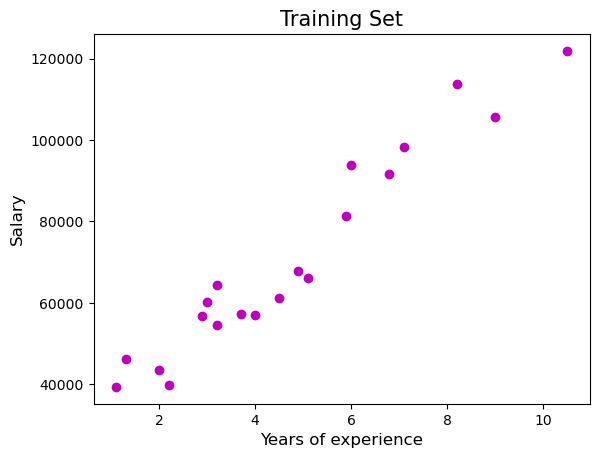

In [9]:
plt.scatter(x_train,y_train,color="m")
plt.xlabel("Years of experience",fontsize=12)
plt.ylabel("Salary",fontsize=12)
plt.title("Training Set",fontsize=15)
plt.show()

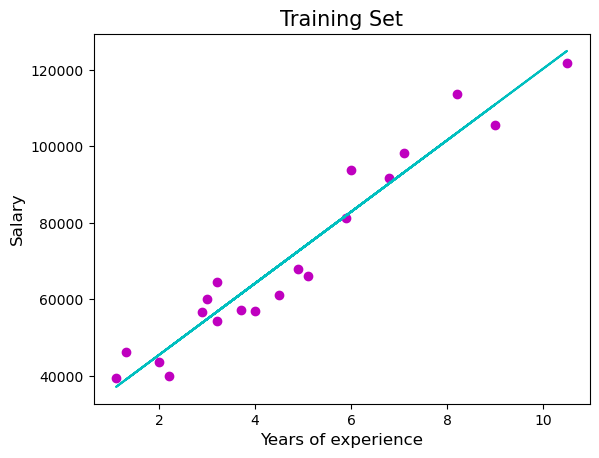

In [10]:
plt.scatter(x_train,y_train,color="m")
plt.xlabel("Years of experience",fontsize=12)
plt.ylabel("Salary",fontsize=12)
plt.title("Training Set",fontsize=15)

plt.plot(x_train,regressor.predict(x_train),color="c")
plt.show()

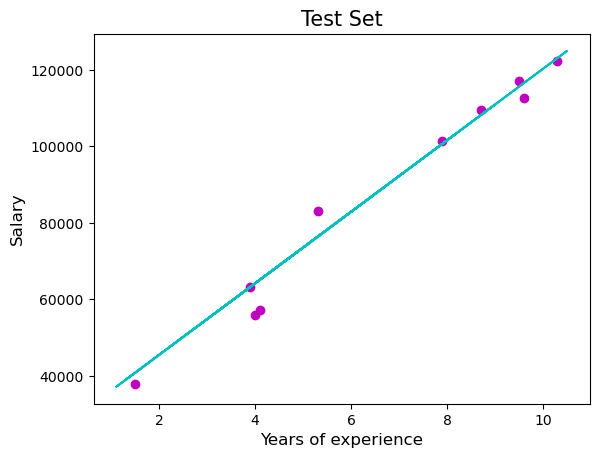

In [11]:
plt.scatter(x_test,y_test,color="m")
plt.xlabel("Years of experience",fontsize=12)
plt.ylabel("Salary",fontsize=12)
plt.title("Test Set",fontsize=15)
plt.plot(x_train,regressor.predict(x_train),color="c")
plt.show()

In [12]:
y_pred1=regressor.predict([[4]])
print(y_pred1)

y_pred2=regressor.predict([[7]])
print(y_pred2)

[64199.96201652]
[92237.78934589]


In [13]:
y_pred3=regressor.predict(x_test)
print(y_pred3)

[ 40835.10590871 123079.39940819  65134.55626083  63265.36777221
 115602.64545369 108125.8914992  116537.23969801  64199.96201652
  76349.68719258 100649.1375447 ]


In [14]:
y_predall=regressor.predict(x)
print(y_predall)

[ 37096.72893147  38965.91742009  40835.10590871  45508.07713028
  47377.2656189   53919.42532909  54854.0195734   56723.20806202
  56723.20806202  61396.17928358  63265.36777221  64199.96201652
  64199.96201652  65134.55626083  68872.93323808  72611.31021533
  74480.49870396  76349.68719258  81957.25265845  82891.84690277
  90368.60085726  93172.3835902  100649.1375447  103452.92027763
 108125.8914992  110929.67423213 115602.64545369 116537.23969801
 123079.39940819 124948.58789682]


In [15]:
print(regressor.coef_)
print(regressor.intercept_)

[9345.94244312]
26816.19224403119


In [16]:
print("R squared: {:.2f}".format(regressor.score(x,y)*100))

R squared: 95.65


In [19]:
from sklearn.metrics import  mean_squared_error ,r2_score
mse=mean_squared_error(y,y_predall)
r_squared=r2_score(y,y_predall)
print(f"Slope (m): {regressor.coef_[0]}")
print(f"Intercept (c): {regressor.intercept_}")
print(f"Mean squared error (MSE): {mse}")
print(f"R-squared: {r_squared}")


Slope (m): 9345.94244312237
Intercept (c): 26816.19224403119
Mean squared error (MSE): 31577311.6194268
R-squared: 0.9565349708076958


In [20]:
regressor.score(x_test,y_test)

0.9749154407708353

In [33]:
#OPTIMIZED

x=dataset.iloc[:,0]
y=dataset.iloc[:,-1]

m=0.0
c=0.0
alpha=0.01
iterations=10000
n=len(y)


In [35]:
for _ in range(iterations):
    y_pred=m*x+c
    d_m=(-2/n)*np.sum(x*(y-y_pred))
    d_c=(-2/n)*np.sum(y-y_pred)
    m=m-alpha*d_m
    c=c-alpha*d_c
m,c

(9449.962321455143, 25792.20019866825)

In [36]:
print(f"Slope (m): {m}")
print(f"Intercept (c): {c}")

Slope (m): 9449.962321455143
Intercept (c): 25792.20019866825


In [38]:
def predict(yrs_of_exp):
    return m*yrs_of_exp +c

predicted_salaries=predict(4)
predicted_salaries

63592.04948448882

In [39]:
import math
predicted_salaries=m*x+c
r_squared=1-(np.sum((y-predicted_salaries)**2)/np.sum((y-np.mean(y))**2))
mse=np.mean((y-predicted_salaries)**2)

print(f"R-squared: {r_squared}")
print(f"MSE: {mse}")

R-squared: 0.9569566641435086
MSE: 31270951.72228094


In [40]:
y_actual=np.array([45000,50000,60000,65000,70000])
y_predicted=np.array([46000,51000,59000,64000,71000])
mse=np.mean((y_actual-y_predicted)**2)
print(f"Mean Sqared Error (MSE):{mse}")

Mean Sqared Error (MSE):1000000.0


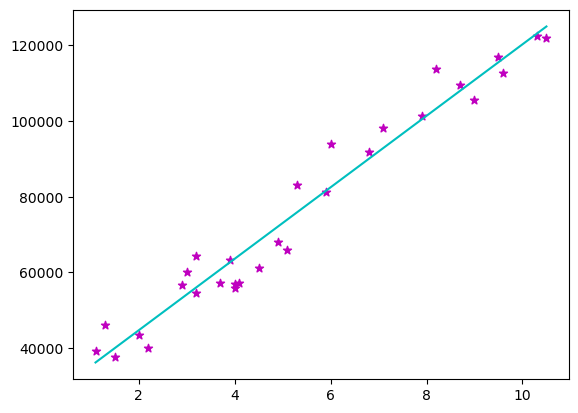

In [44]:
y_pred=m*x+c
plt.scatter(x,y,marker="*",color="m")
plt.plot([min(x),max(x)],[min(y_pred),max(y_pred)],color="c")
plt.show()